In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
ev_df = pd.read_csv('../Case Study(EV)/Electric_Vehicle_Population_Data.csv')

In [3]:
ev_df.head(20)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,14.0,150126840,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,1N4AZ0CP8F,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,26.0,137322111,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,47.0,240226332,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
for cols in ev_df.columns:
    if ev_df[cols].isnull().sum()>0:
        print(cols, ev_df[cols].isnull().sum())

County 5
City 5
Postal Code 5
Legislative District 389
Vehicle Location 9
Electric Utility 5
2020 Census Tract 5


In [6]:
ev_df.dropna(inplace=True)

#### Growth in EV sales 

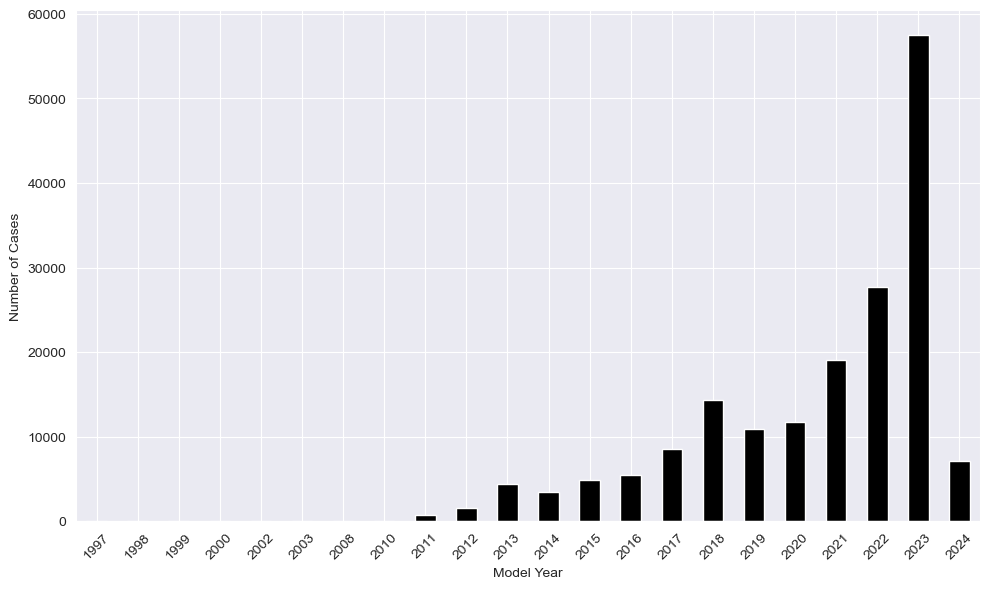

In [7]:
# EV Adoption Over Time
plt.figure(figsize=(10, 6))
ev_adoption = ev_df['Model Year'].value_counts().sort_index()
ev_adoption.plot(kind='bar',color='black')
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

###### clearly shows significant adoption of EVs in 2023 compared to steady growth till 2022, 2024 data seems to be incomplete  

#### Adoption by Countries 

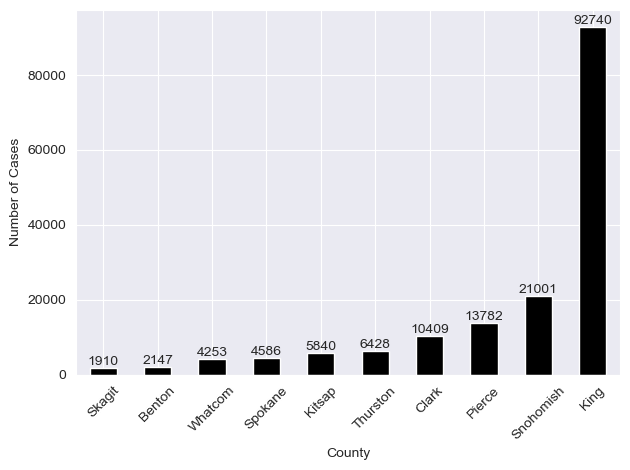

In [8]:
top_counties = ev_df['County'].value_counts(ascending=True).tail(10)
top_counties.plot(kind='bar',color='black')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')
plt.tight_layout()
for i, count in enumerate(top_counties):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


In [9]:
test = top_counties.tail(3).index.tolist()

In [10]:
filtred_by_country = ev_df.loc[ev_df['County'].isin(test)]
filtred_by_country_city = filtred_by_country.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name = 'Number of Vehicle')


In [11]:
top_cities= filtred_by_country_city.head(10)

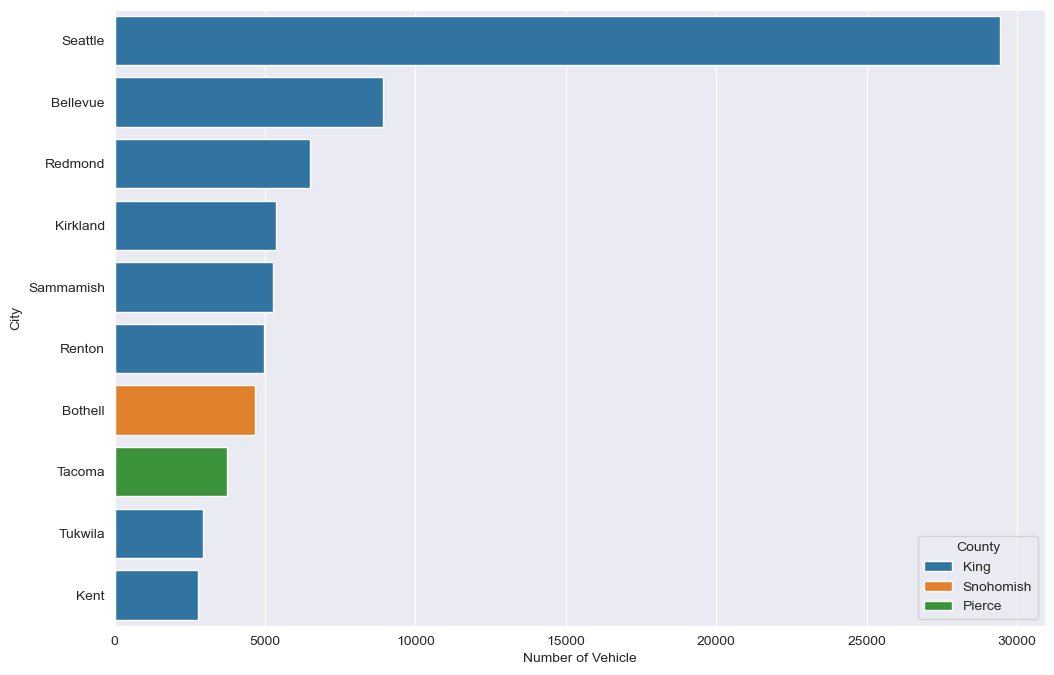

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicle', y= 'City', hue= 'County',data=top_cities)
plt.legend(title='County')
plt.show()

In [13]:
vehicle_in_top_city = top_cities['Number of Vehicle'].sum()
print(vehicle_in_top_city/ev_df.shape[0])

0.42018222490181606


###### While there are 438 cities about 42% of all EVs are in 10 cities in 3 countries 

In [14]:
filtred_by_country_city.groupby(['County']).sum().iloc[0]['Number of Vehicle']/ev_df.shape[0]

0.5225583609901224

##### 52% of total EVs in a single county, Adoption is more regional than global 

### EV types 

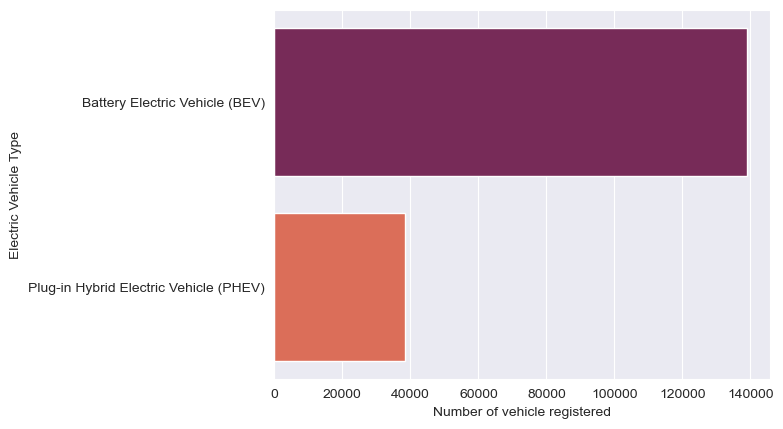

In [15]:
ev_types = ev_df['Electric Vehicle Type'].value_counts()
sns.barplot(x=ev_types.values,y=ev_types.index,palette='rocket', hue=ev_types.index)
plt.ylabel('Electric Vehicle Type')
plt.xlabel('Number of vehicle registered')
plt.show()


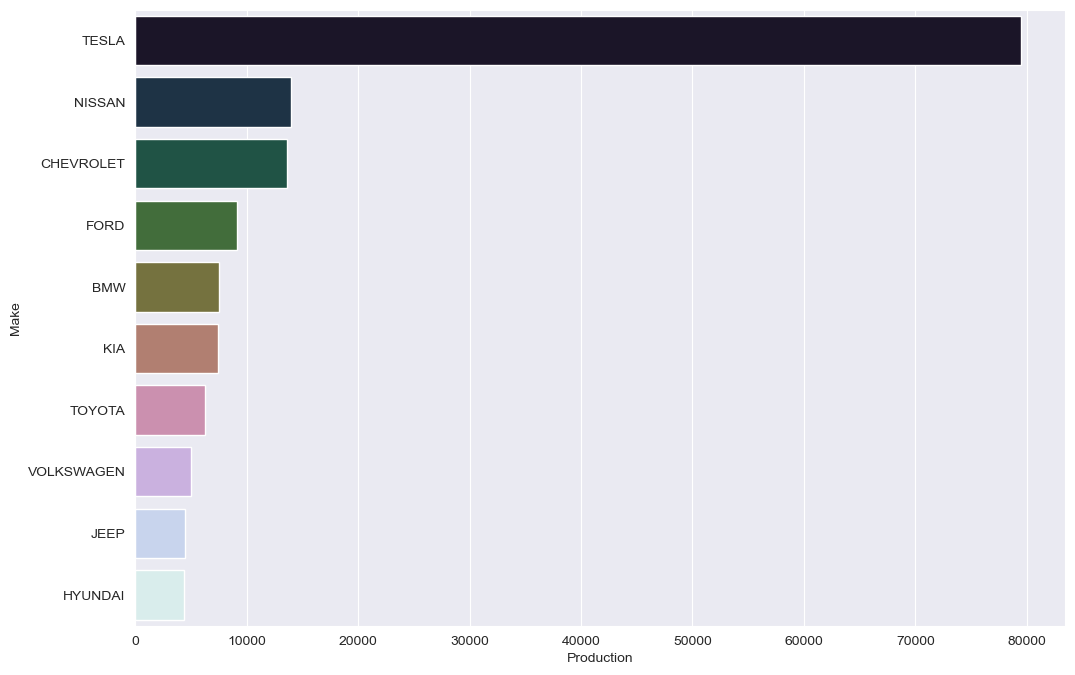

In [16]:
ev_maker = ev_df['Make'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=ev_maker.values,y= ev_maker.index,palette='cubehelix', hue=ev_maker.index)
plt.xlabel('Production')
plt.show()

##### TESLA leads by a substantial margin with the highest number of vehicles registered.


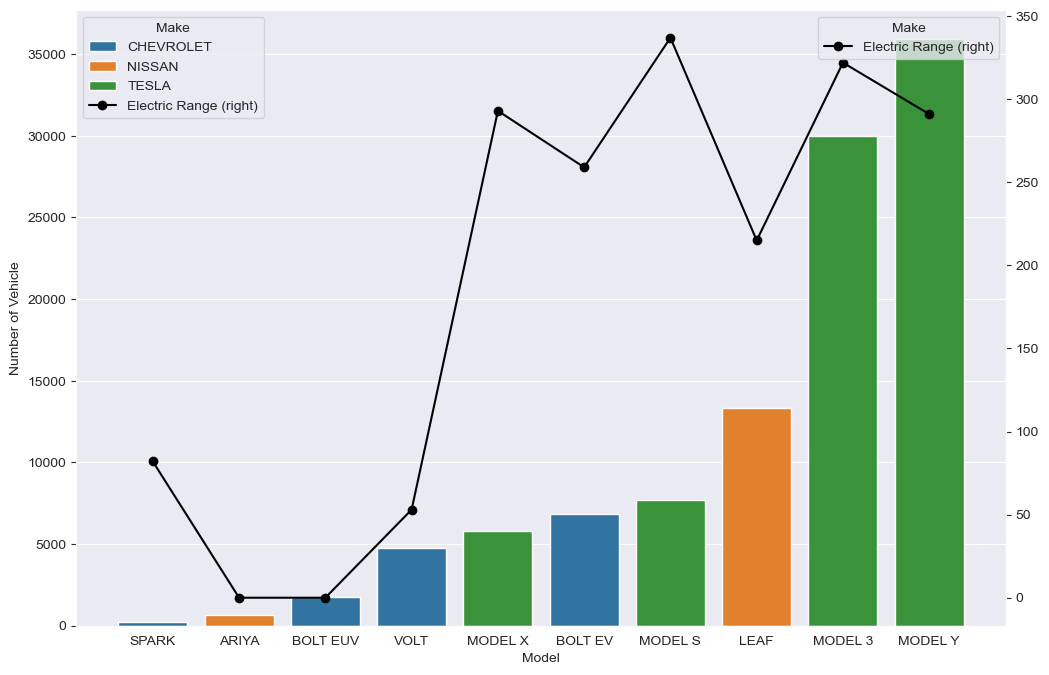

In [109]:
plt.figure(figsize=(12, 8))
top_makers = ev_maker.head(3).index.tolist()
filterd_by_make = ev_df.loc[ev_df['Make'].isin(top_makers)]

ev_distirbution_make_model = (filterd_by_make.groupby(['Make','Model']).
                              size().
                              sort_values(ascending=True).
                              reset_index(name = 'Number of Vehicle'))

top_models = ev_distirbution_make_model.tail(10)['Model'].tolist()

ranges = {}
for model in top_models:
    max_range = ev_df[ev_df['Model'] == model]['Electric Range'].max()
    ranges[model] = max_range

max_ranges_per_model = pd.DataFrame.from_dict(ranges,orient='index',columns=['Electric Range'])

    


ax = sns.barplot(x='Model', y='Number of Vehicle', hue= 'Make', data=ev_distirbution_make_model.tail(10))
max_ranges_per_model.plot(kind='line', color='black',ax=ax,secondary_y=True,marker='o')

plt.legend(title='Make')
plt.show()

##### Higer selling cars typically have high range, but if a car has higher range and sells less then maybe it is priced higher 

### Growth in range

<Axes: xlabel='Model Year', ylabel='Electric Range'>

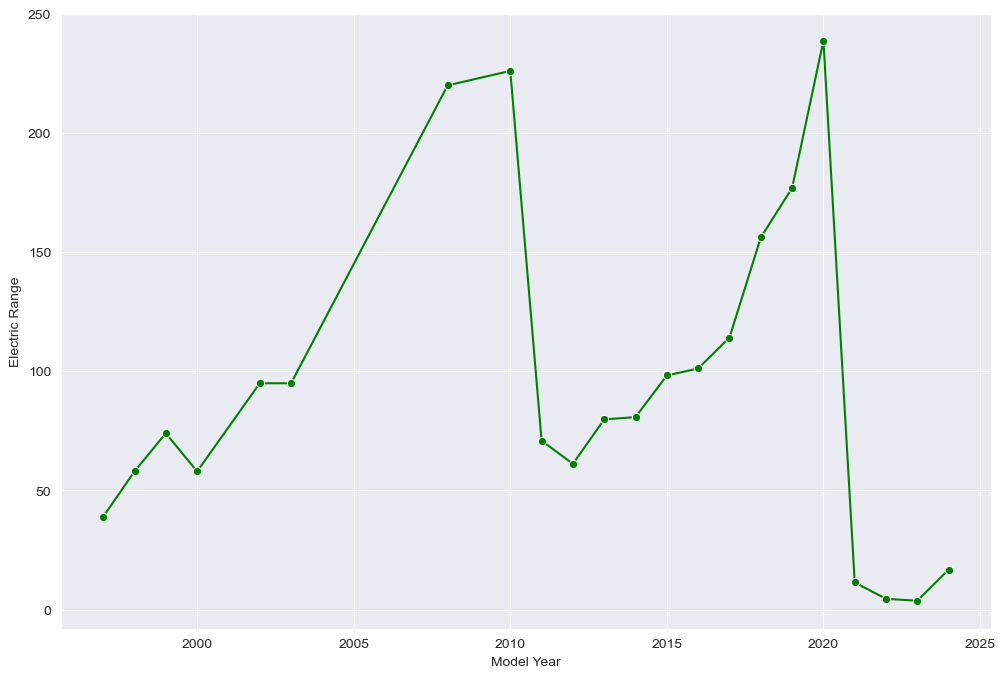

In [121]:
range_year = ev_df.groupby('Model Year')['Electric Range'].mean().reset_index(name='Electric Range').tail(30)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='Electric Range', data=range_year,color='green', marker='o')


###### shows steady growth from 2012 onwards with peak at 2020. Rapid decline from 2020 onwards maybe due to incomplete data 

In [134]:
ev_count = ev_df['Model Year'].value_counts()
ev_count

Model Year
2023    57519
2022    27708
2021    19063
2018    14286
2020    11740
2019    10913
2017     8534
2024     7072
2016     5469
2015     4826
2013     4399
2014     3496
2012     1614
2011      775
2010       23
2008       19
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

In [179]:
from scipy.optimize import curve_fit
filtered_years = ev_count[ev_count.index <=2023]
def exp_growth(x,a,b):
    return a*np.exp(b*x)

x = filtered_years.index - filtered_years.index.min()
y=filtered_years.values
popt, pcov = curve_fit(exp_growth,x,y)

forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *popt)
print(forecasted_values)

[ 79079.20584273 119653.9573991  181047.20917075 273940.72591504
 414496.97931595 627171.24402792]


In [191]:
forcast = pd.Series()
for year,value in zip(forecast_years,forecasted_values):
    forcast[year+filtered_years.index.min()] = value
    

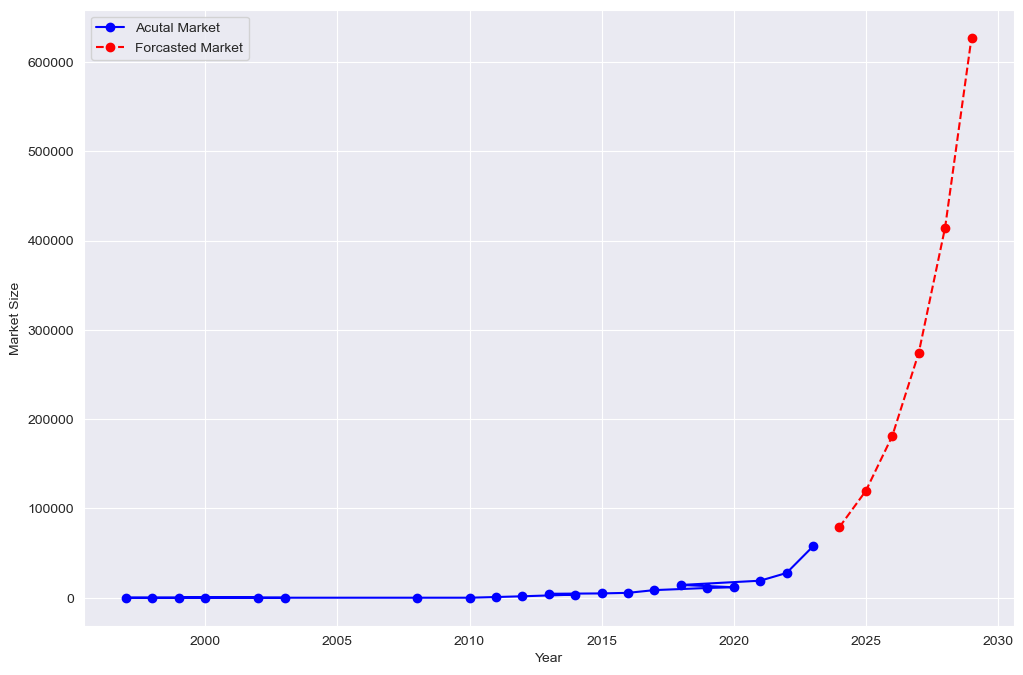

In [204]:
plt.figure(figsize=(12, 8))
ax = filtered_years.plot(kind='line', color='blue',marker='o', label = 'Acutal Market')
forcast.plot(kind='line', color='red',marker='o',ax=ax,label= 'Forcasted Market',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Market Size')
plt.legend()

plt.show()


##### The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

### Conclusion
###### Exponential growth in market size of electric vehicle
###### Looks more like regional growth than global growth  